<a href="https://colab.research.google.com/github/Jaydenzk/Video-Games-Sales/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.
- [ ] Determine whether your problem is regression or classification.
- [ ] Choose your evaluation metric.
- [ ] Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.
- [ ] Begin to clean and explore your data.
- [ ] Choose which features, if any, to exclude. Would some features "leak" information from the future?

## Reading
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016 (1).csv


In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python package:
    # category_encoders, version >= 2.0
    !pip install --upgrade category_encoders

     |████████████████████████████████| 92kB 3.3MB/s 


In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.shape

(16719, 16)

In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
## Keep columns's name simple form

df = df.rename(columns={"Year_of_Release": "Year", "NA_Sales": "NA", "EU_Sales": "EU", "JP_Sales": "JP", "Other_Sales": "Other", "Global_Sales": "Global"})
df = df[df["Year"].notnull()]
df = df[df["Genre"].notnull()]
df["Year"] = df["Year"].apply(int)
df["Global"] = df["Global"].apply(int)

In [8]:
df['Year'].describe()

count    16448.000000
mean      2006.488996
std          5.877470
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [9]:
df.dtypes

Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA              float64
EU              float64
JP              float64
Other           float64
Global            int64
Critic_Score    float64
Critic_Count    float64
User_Score       object
User_Count      float64
Developer        object
Rating           object
dtype: object

In [0]:
df = df.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'])

In [11]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31


In [12]:
df.describe()

,Year,NA,EU,JP,Other,Global
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000
mean,2006.488996,0.263965,0.145895,0.078472,0.047583,0.294504
std,5.877470,0.818286,0.506660,0.311064,0.187984,1.504082
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.000000


In [13]:
df['Platform'].value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      431
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [14]:
df = df[(df['Platform'] == 'X360') | (df['Platform'] == 'PS3')]

#Let's double check the value counts to be sure
print(pd.value_counts(df["Platform"]))

#Let's see the shape of the data again
print(df.shape)

PS3     1306
X360    1232
Name: Platform, dtype: int64
(2538, 10)


In [0]:
## platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
##             "Xbox" : ["XB", "X360", "XOne"], 
##             "PC" : ["PC"],
##             "Nintendo" : ["Wii", "WiiU"],
##             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [15]:
df.dtypes

Name          object
Platform      object
Year           int64
Genre         object
Publisher     object
NA           float64
EU           float64
JP           float64
Other        float64
Global         int64
dtype: object

In [16]:
from sklearn.model_selection import train_test_split

# Split into train & test sets first

X_train, X_test = train_test_split(df, train_size=0.8, test_size=0.2, 
                                  stratify=df['Platform'], random_state=42)

# Split X_train into train and val sets

X_train, X_val = train_test_split(X_train, train_size=0.8, test_size=0.2, 
                                 stratify=X_train['Platform'], random_state=42)

# Target is Platform on each features

target = 'Platform'
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

X_train = X_train.drop(columns=target)
X_val = X_val.drop(columns=target)
X_test = X_test.drop(columns=target)


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1624, 9), (1624,), (406, 9), (406,), (508, 9), (508,))

In [17]:
print('Train:\n', y_train.value_counts(normalize=True))
print('Validation:\n', y_val.value_counts(normalize=True))
print('Test:\n', y_test.value_counts(normalize=True))

Train:
 PS3     0.514778
X360    0.485222
Name: Platform, dtype: float64
Validation:
 PS3     0.514778
X360    0.485222
Name: Platform, dtype: float64
Test:
 PS3     0.51378
X360    0.48622
Name: Platform, dtype: float64


In [18]:
# Normalize y_train

y_train.value_counts(normalize=True)

PS3     0.514778
X360    0.485222
Name: Platform, dtype: float64

In [19]:
# Accuracy Score

from sklearn.metrics import accuracy_score

majority = y_train.mode()[0]
maj_pred = [majority] * len(y_train)
accuracy_score(y_train, maj_pred)

0.5147783251231527

In [20]:
Global = 'Global'
numeric = X_train.select_dtypes('number').columns.drop(Global).tolist()

for col in numeric:
    X_train[col] = X_train[col].astype('object')

print(X_train.shape)
X_train.dtypes

(1624, 9)


Name         object
Year         object
Genre        object
Publisher    object
NA           object
EU           object
JP           object
Other        object
Global        int64
dtype: object

In [21]:
for col in numeric:
    X_val[col] = X_val[col].astype('object')

print(X_val.shape)

(406, 9)


In [22]:
for col in numeric:
    X_test[col] = X_test[col].astype('object')

print(X_test.shape)

(508, 9)


In [24]:
#Random Forest

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Create ML pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

# Fit to train
pipeline.fit(X_train, y_train)

# Score on val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.5886699507389163


In [0]:
y_pred = pipeline.predict(X_test)

In [25]:
# XGboost

from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# fit on train, score on val
pipeline.fit(X_train, y_train)

print('Validation Accuracy: ', pipeline.score(X_val, y_val))

Validation Accuracy:  0.687192118226601


In [0]:
# Let's do a permutation importance to see the most important features
# Rerun the random forest classifier outside the pipeline

transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
# Let's do eli5 to see which columns to use

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val_transformed, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None,  # show the permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.0653 ± 0.0025,JP
0.0382 ± 0.0025,Other
0.0000 ± 0.0197,NA
-0.0012 ± 0.0074,Publisher
-0.0074 ± 0.0099,Global
-0.0099 ± 0.0049,EU
-0.0172 ± 0.0049,Year
-0.0209 ± 0.0123,Genre
-0.0382 ± 0.0025,Name


In [0]:
from sklearn.metrics import classification_report

# Calculate y_pred
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         PS3       0.72      0.65      0.68       209
        X360       0.66      0.73      0.69       197

    accuracy                           0.69       406
   macro avg       0.69      0.69      0.69       406
weighted avg       0.69      0.69      0.69       406



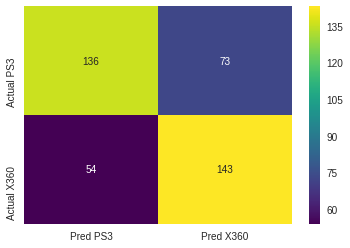

In [0]:
# Let's see the heatmap

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Pred {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='.0f', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

[0.01716754 0.30730668 0.57692474 0.56548905 0.19942772 0.18384795
 0.41163394 0.6732205  0.19076598 0.7085873  0.6397767  0.43112263
 0.03279862 0.07202461 0.2891322  0.6718225  0.6777     0.45004165
 0.37885913 0.56348544 0.09313939 0.40971026 0.70006037 0.39521122
 0.14394891 0.83293587 0.5710622  0.5239994  0.25920063 0.52859294
 0.64003235 0.5447448  0.577849   0.6802317  0.29045296 0.58612
 0.5929614  0.01174855 0.5168612  0.41440532 0.41608977 0.6489977
 0.08871596 0.32687816 0.81377584 0.43197826 0.55071217 0.6242325
 0.18686765 0.1382416  0.6692565  0.75971204 0.8056988  0.7166451
 0.50959384 0.59994614 0.6194788  0.57746404 0.3016526  0.03875752
 0.5639059  0.41202548 0.04516079 0.59907657 0.3038053  0.22422929
 0.26723406 0.26649526 0.06774596 0.16060056 0.56904316 0.6023167
 0.30656573 0.39064786 0.10648721 0.4729845  0.43461412 0.06851242
 0.39158502 0.37103274 0.5874747  0.18927293 0.6196053  0.01886755
 0.47834626 0.6723438  0.41208377 0.72535104 0.32853058 0.01743892
 0

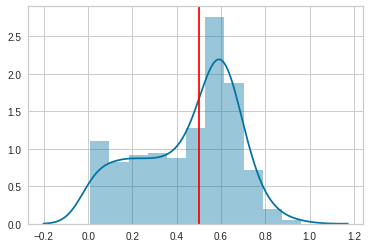

In [0]:
y_pred_proba = pipeline.predict_proba(X_val)[:,1]
print(y_pred_proba)

threshold = 0.5
ax = sns.distplot(y_pred_proba)
ax.axvline(threshold, color='red');

In [0]:
# confusion matrix for majority baseline

majority_class = y_train.mode()[0]
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.5147783251231527

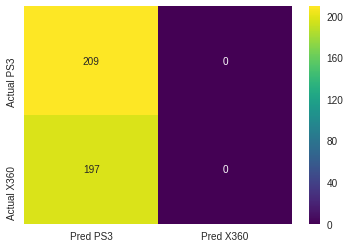

In [0]:
plot_confusion_matrix(y_val, y_pred);

In [0]:
from yellowbrick.classifier import ClassPredictionError

# Classes assign
classes = ['X360', 'PS3']

# Encode X_train & X_val
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

# Impute
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

visualizer = ClassPredictionError(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1), 
    classes=classes
)

In [0]:
# Partial Dependence
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit model
model.fit(X_train_imputed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
!pip install pdpbox

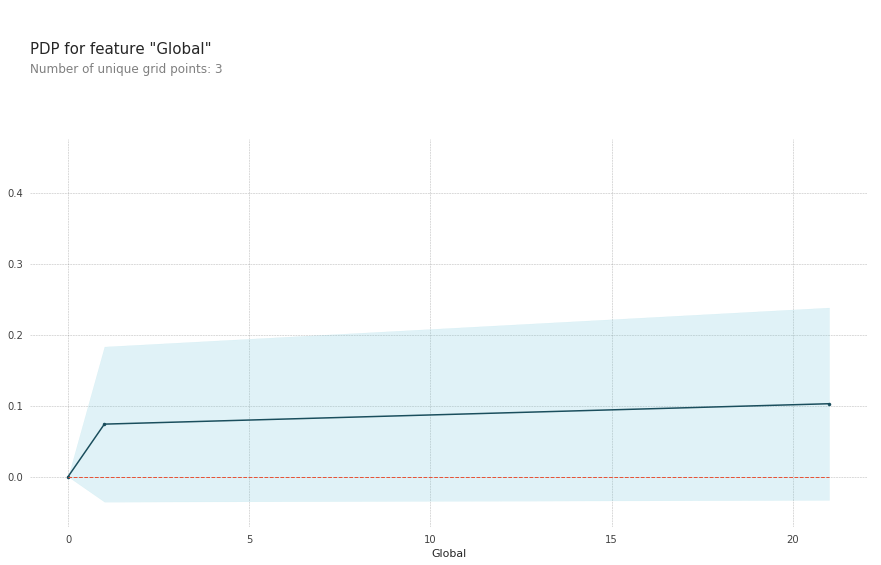

In [0]:
# Pdpbox feature for Global

%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'Global'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

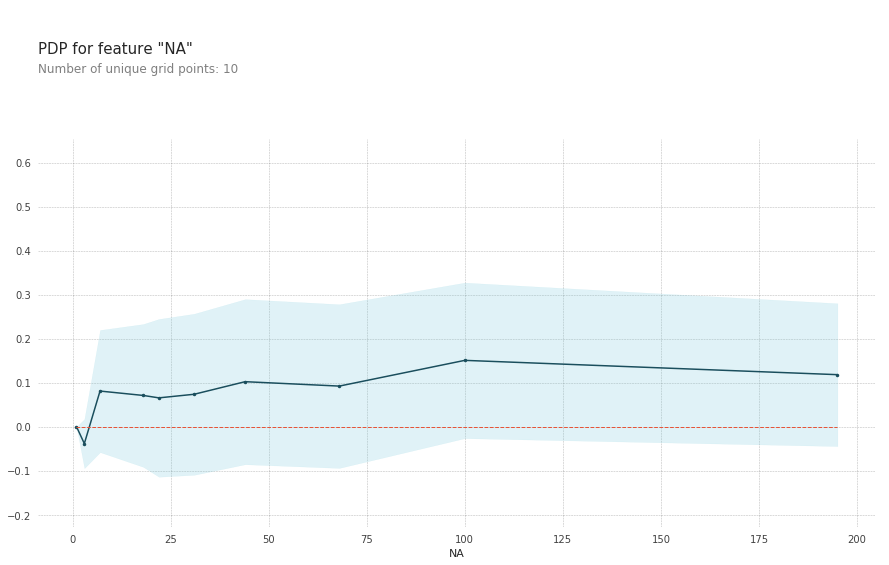

In [0]:
# Feature for NA

feature = 'NA'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

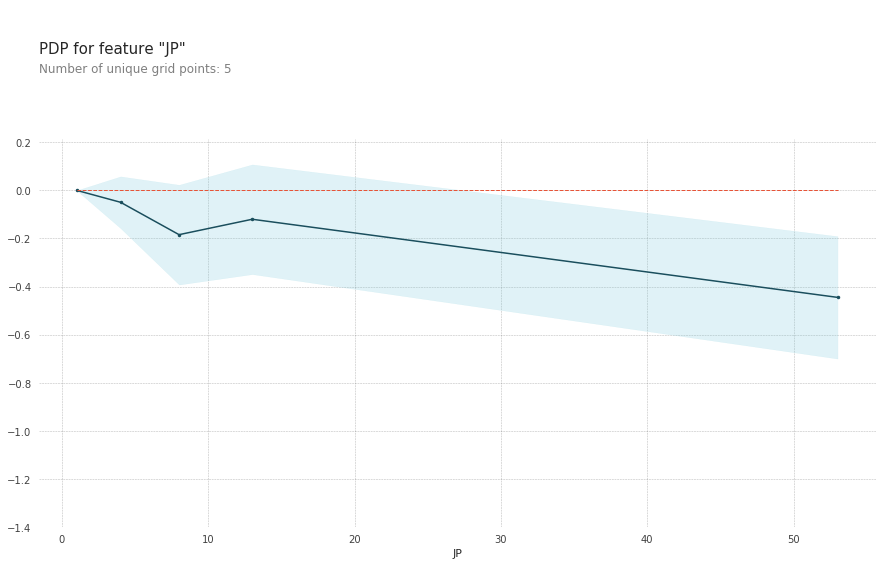

In [0]:
# Feature for JP

feature = 'JP'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

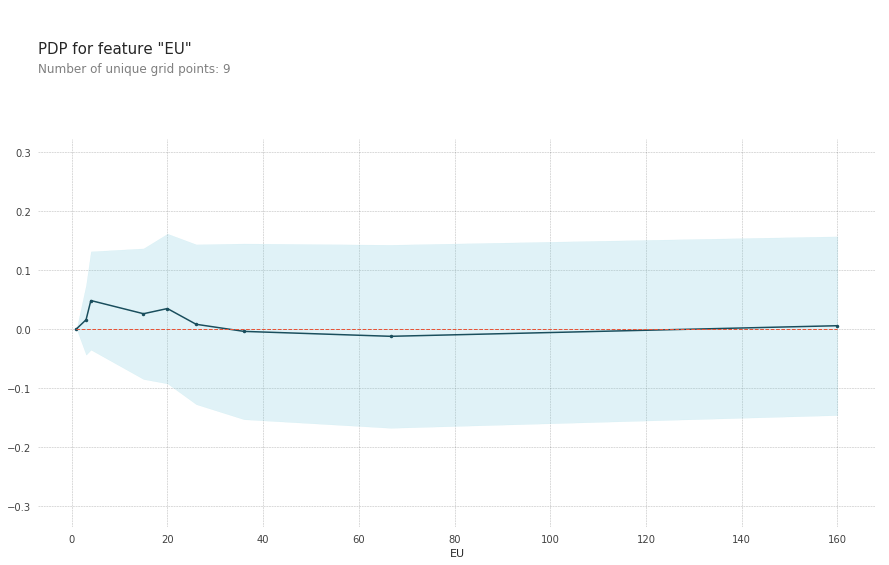

In [0]:
# Feature for EU

feature = 'EU'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

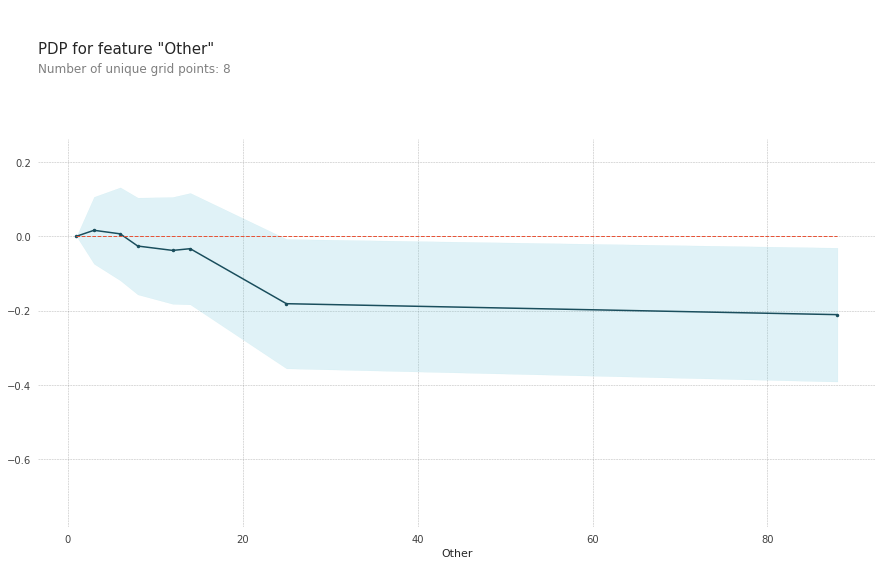

In [0]:
# Feature for Other

feature = 'Other'
features = X_train.columns.tolist()
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [0]:
!pip install shap

     |████████████████████████████████| 235kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.29.3-cp36-cp36m-linux_x86_64.whl size=344727 sha256=d2f7ed31fe2d8b225d9a01ce9a56eece84ed241a8863f813ce895947b7eedd99
  Stored in directory: /root/.cache/pip/wheels/00/20/87/d199e4d7397997f5494e4098104f91313ac8120753bee7b032
Successfully built shap


In [0]:
# Look at predictions vs actuals
pred_act = pd.DataFrame({
    'y_pred_proba': y_pred_proba, 
    'y_val': y_val
})

pred_act.head()

,y_pred_proba,y_val
2465,0.017168,PS3
6546,0.307307,X360
3882,0.576925,X360
7363,0.565489,X360
11521,0.199428,PS3


In [0]:
PS3 = pred_act['y_val'] == 'PS3'
X360 = ~PS3
right = (PS3) == (pred_act['y_pred_proba'] > 0.5)
wrong = ~right

In [0]:
# Sample PS3 & right
pred_act[PS3 & right].sample(n=10, random_state=42).sort_values(by='y_pred_proba')

,y_pred_proba,y_val
2462,0.516861,PS3
7617,0.539385,PS3
1733,0.550416,PS3
9630,0.555247,PS3
15227,0.579012,PS3
10519,0.587475,PS3
2451,0.589221,PS3
1783,0.633624,PS3
2704,0.639777,PS3
8271,0.725351,PS3


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.684391	validation_1-auc:0.679632
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.688636	validation_1-auc:0.692663
[2]	validation_0-auc:0.703336	validation_1-auc:0.699463
[3]	validation_0-auc:0.713236	validation_1-auc:0.696864
[4]	validation_0-auc:0.719654	validation_1-auc:0.703629
[5]	validation_0-auc:0.72259	validation_1-auc:0.698358
[6]	validation_0-auc:0.724105	validation_1-auc:0.698006
[7]	validation_0-auc:0.728619	validation_1-auc:0.695869
[8]	validation_0-auc:0.731789	validation_1-auc:0.691351
[9]	validation_0-auc:0.734621	validation_1-auc:0.695869
[10]	validation_0-auc:0.734268	validation_1-auc:0.696488
[11]	validation_0-auc:0.736291	validation_1-auc:0.69865
[12]	validation_0-auc:0.738657	validation_1-auc:0.694399
[13]	validation_0-auc:0.739551	validation_1-auc:0.696646
[14]	validation_0-auc:0.741663	validation_1-auc:0.695723


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
row = X_val.loc[[8271]]

In [0]:
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)

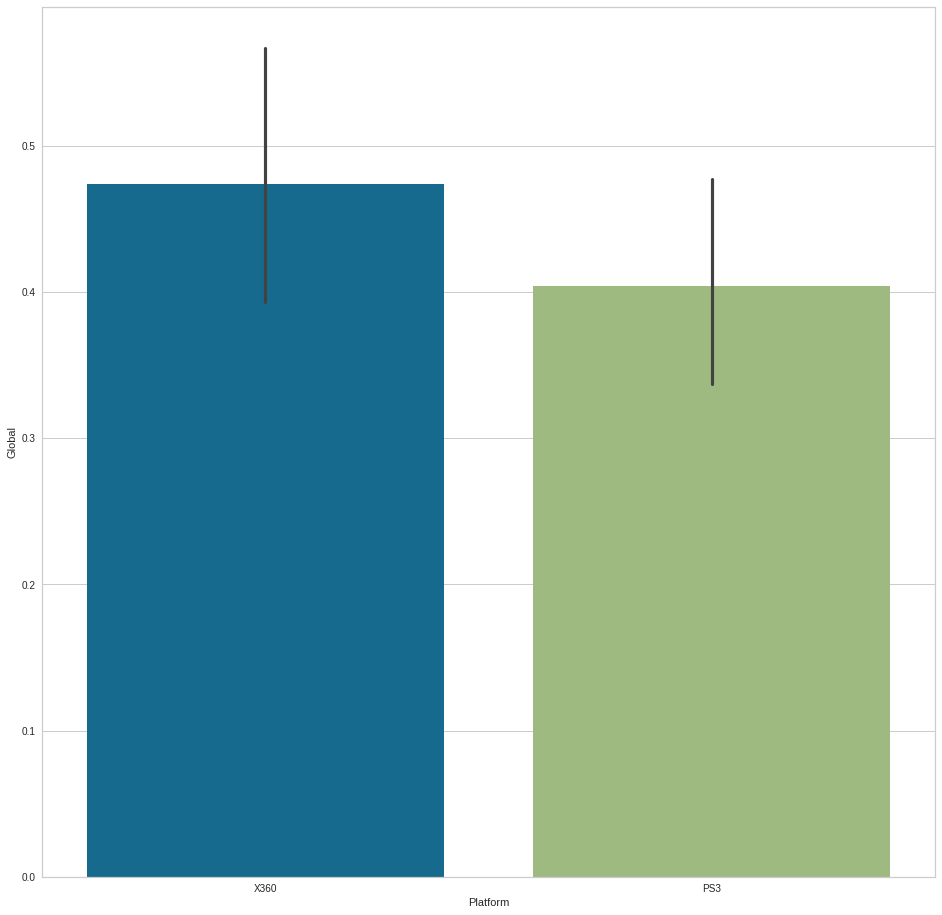

In [0]:
dfsub = df[df.Global.notnull()]
plt.figure(figsize=(16, 16))
plt.xticks(rotation=0)
sns.barplot(x="Platform", y="Global", data=dfsub);